Study Markov and Hidden Markov model to identify CpG island in human genome sequence (Chr. 21)

Markov Model:
Sequence used in the project

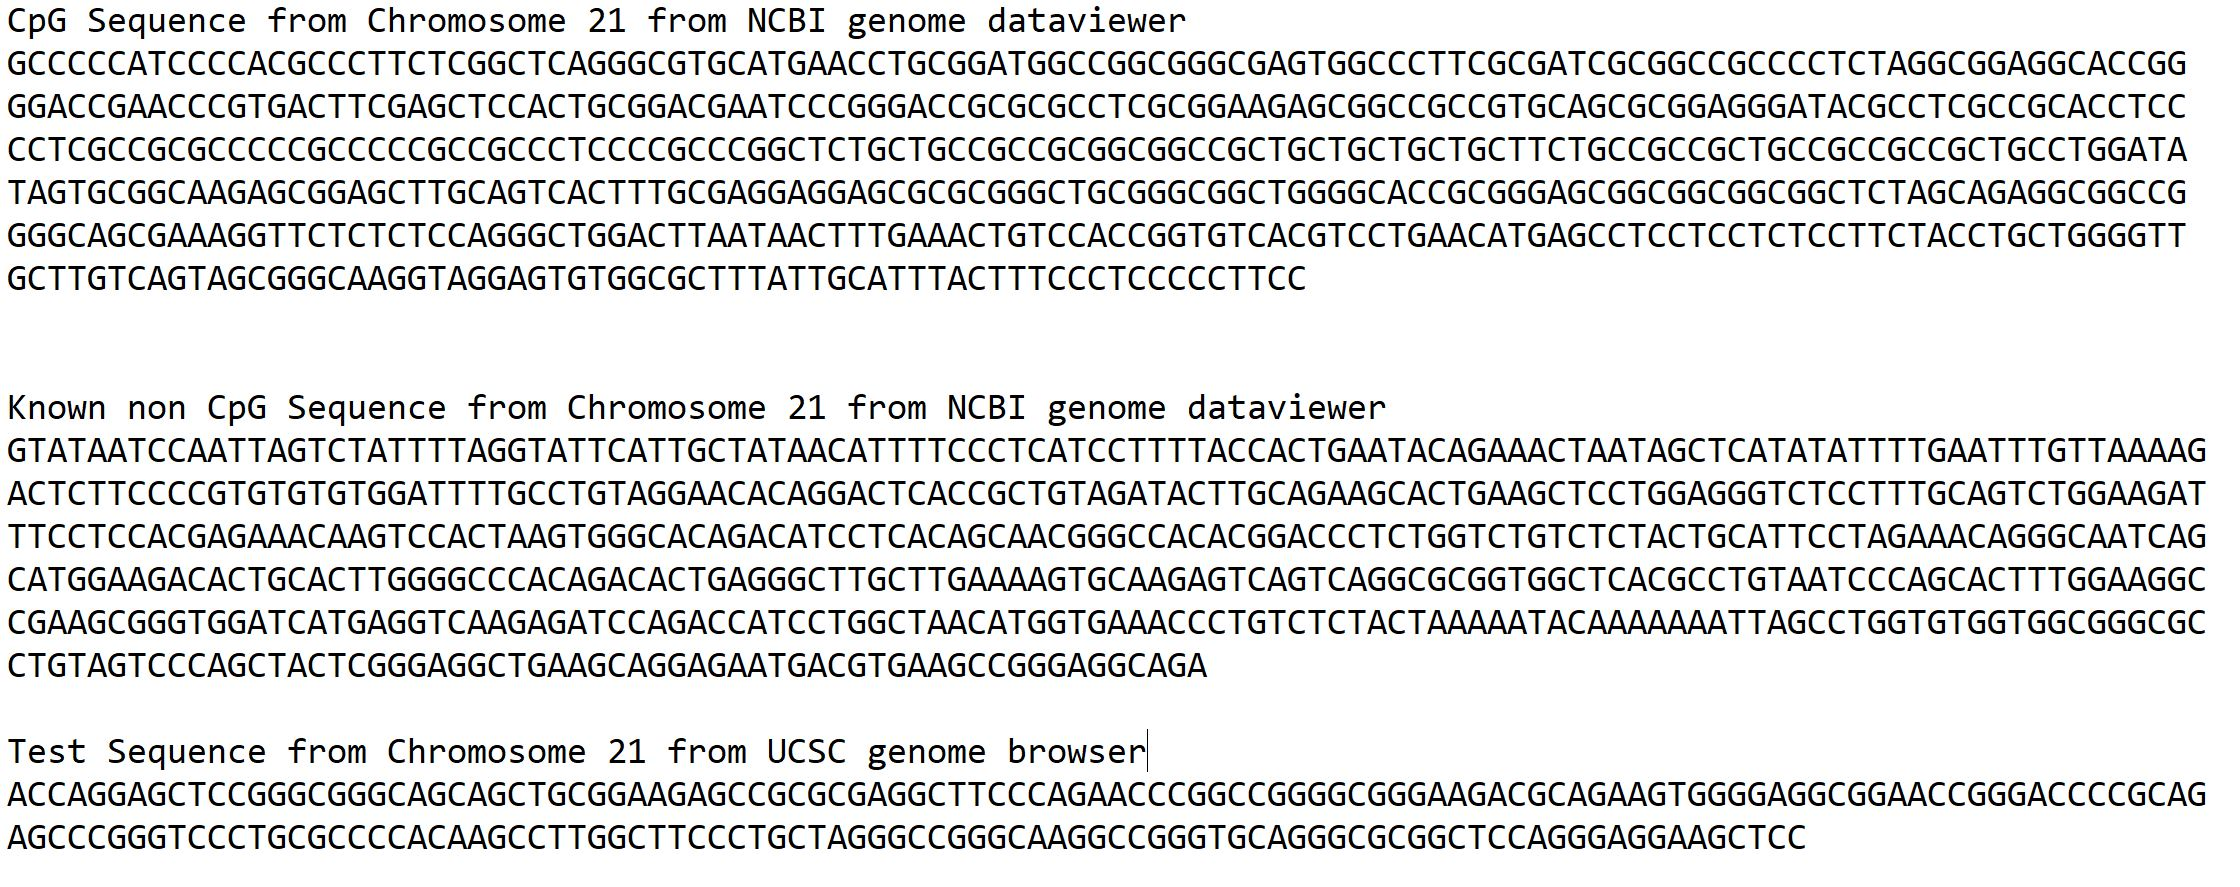





Transition Matrix CpG Sequence:

Assuming equal initial transition probability of 0.25 for each state:

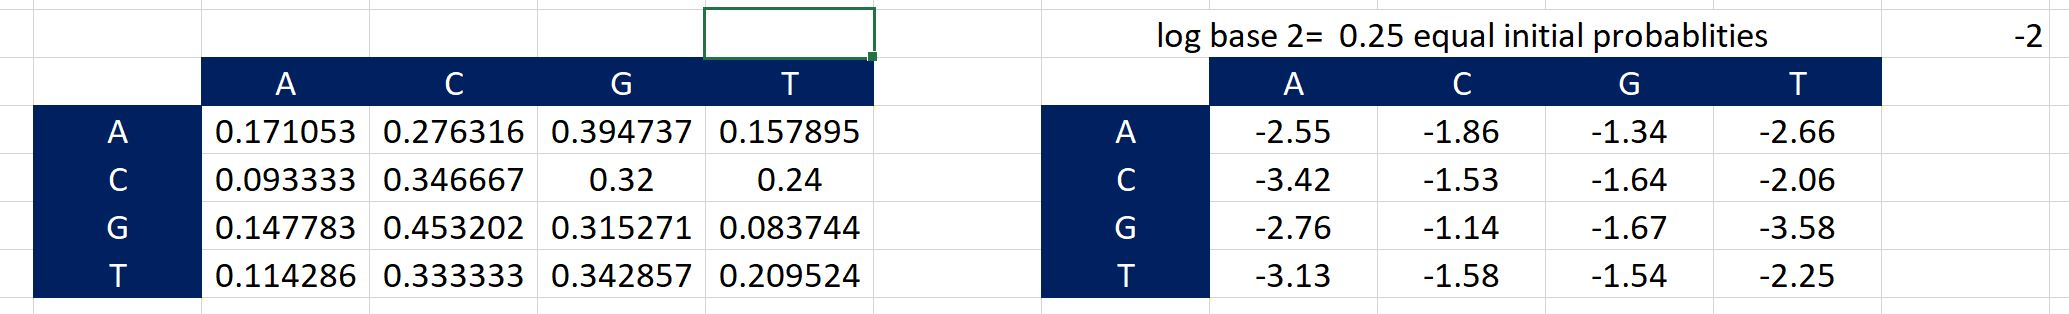



Scoring the test model against the CpG matrix has log base 2 score: -358.77

Transition Matrix non CpG Sequence:

Assuming equal initial transition probability of 0.25 for each state:

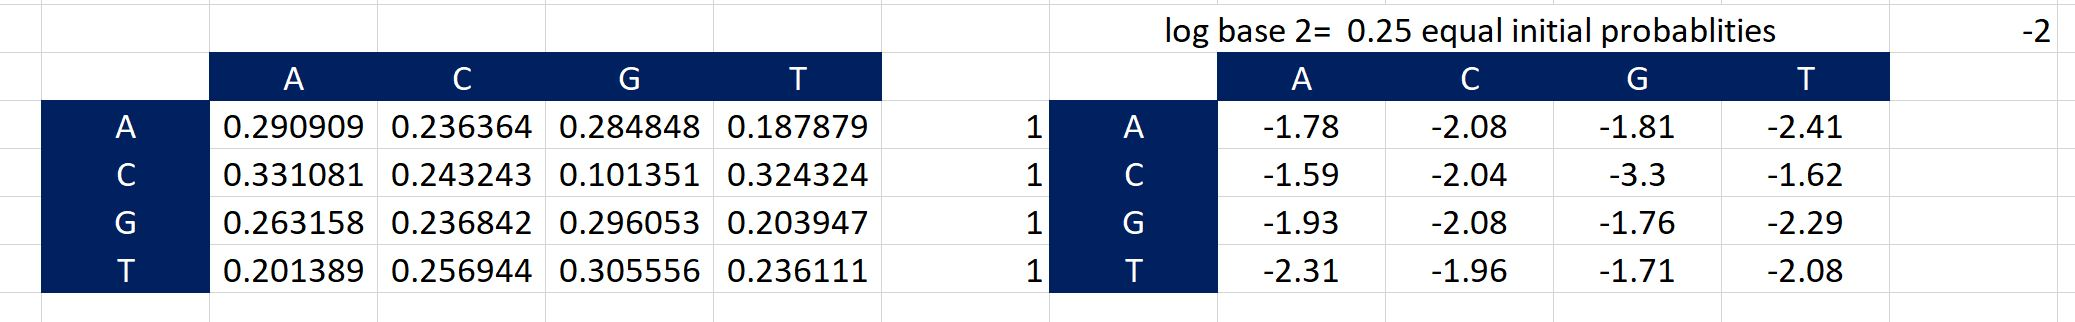



Scoring the test model against the CpG matrix has log base 2 score: -405.91

Clearly, test sequence scores well against the CpG islands transition matrix and hence the test sequence has higher probability to be generated by CpG sequence as compared to non CpG sequence

In [95]:
#Program used to compute the transition matrix

def count(substr, theStr):
    """counting substr GC in theStr to find number of GC nucleotides in large seq of DNA"""
    num = i = 0
    while True:
        j = theStr.find(substr, i)
        if j == -1:
            break
        num += 1
        i = j + 1
    return num

print(len('GCCCCCATCCCCACGCCCTTCTCGGCTCAGGGCGTGCATGAACCTGCGGATGGCCGGCGGGCGAGTGGCCCTTCGCGATCGCGGCCGCCCCTCTAGGCGGAGGCACCGGGGACCGAACCCGTGACTTCGAGCTCCACTGCGGACGAATCCCGGGACCGCGCGCCTCGCGGAAGAGCGGCCGCCGTGCAGCGCGGAGGGATACGCCTCGCCGCACCTCCCCTCGCCGCGCCCCCGCCCCCGCCGCCCTCCCCGCCCGGCTCTGCTGCCGCCGCGGCGGCCGCTGCTGCTGCTGCTTCTGCCGCCGCTGCCGCCGCCGCTGCCTGGATATAGTGCGGCAAGAGCGGAGCTTGCAGTCACTTTGCGAGGAGGAGCGCGCGGGCTGCGGGCGGCTGGGGCACCGCGGGAGCGGCGGCGGCGGCTCTAGCAGAGGCGGCCGGGGCAGCGAAAGGTTCTCTCTCCAGGGCTGGACTTAATAACTTTGAAACTGTCCACCGGTGTCACGTCCTGAACATGAGCCTCCTCCTCTCCTTCTACCTGCTGGGGTTGCTTGTCAGTAGCGGGCAAGGTAGGAGTGTGGCGCTTTATTGCATTTACTTTCCCTCCCCCTTCC')) #cpg seq
print(len('GTATAATCCAATTAGTCTATTTTAGGTATTCATTGCTATAACATTTTCCCTCATCCTTTTACCACTGAATACAGAAACTAATAGCTCATATATTTTGAATTTGTTAAAAGACTCTTCCCCGTGTGTGTGGATTTTGCCTGTAGGAACACAGGACTCACCGCTGTAGATACTTGCAGAAGCACTGAAGCTCCTGGAGGGTCTCCTTTGCAGTCTGGAAGATTTCCTCCACGAGAAACAAGTCCACTAAGTGGGCACAGACATCCTCACAGCAACGGGCCACACGGACCCTCTGGTCTGTCTCTACTGCATTCCTAGAAACAGGGCAATCAGCATGGAAGACACTGCACTTGGGGCCCACAGACACTGAGGGCTTGCTTGAAAAGTGCAAGAGTCAGTCAGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGAAGGCCGAAGCGGGTGGATCATGAGGTCAAGAGATCCAGACCATCCTGGCTAACATGGTGAAACCCTGTCTCTACTAAAAATACAAAAAAATTAGCCTGGTGTGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAAGCAGGAGAATGACGTGAAGCCGGGAGGCAGA'))  #non cpg seq
print(len('ACCAGGAGCTCCGGGCGGGCAGCAGCTGCGGAAGAGCCGCGCGAGGCTTCCCAGAACCCGGCCGGGGCGGGAAGACGCAGAAGTGGGGAGGCGGAACCGGGACCCCGCAGAGCCCGGGTCCCTGCGCCCCACAAGCCTTGGCTTCCCTGCTAGGGCCGGGCAAGGCCGGGTGCAGGGCGCGGCTCCAGGGAGGAAGCTCC'))    #test seq  

610
610
200


In [1]:
Reference: http://www.blackarbs.com/blog/

#import libraries to do computation on the matrices and plot the same
import numpy as np
import pandas as pd
import networkx.drawing.nx_pydot as gl
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

"""creating state space and initial state probabilities"""

states = ['A', 'C','G','T'] # 4 nucliotides in DNA seq are considered as states
pi = [0.25, 0.25, 0.25, 0.25] # initial equal probablities assumed for the model 
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum()) # sum of all theinitial probablity = 1

A    0.25
C    0.25
G    0.25
T    0.25
Name: states, dtype: float64
1.0


In [107]:
# creating transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states
#for non CpG sequence
q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.17, 0.28,0.39,0.16] #transition prob. from A to A, A to C, A to G, A to T
q_df.loc[states[1]] = [0.09, 0.35,0.32,0.24] #transition prob. from C to A, C to C, C to G, C to T
q_df.loc[states[2]] = [0.15, 0.45,0.32,0.084] #transition prob. from G to A, G to C, G to G, G to T
q_df.loc[states[3]] = [0.11, 0.34,0.34,0.21] #transition prob. from T to A, T to C, T to G, T to T

print(q_df)

q = q_df.values
print('\n')
print(q, q.shape)
print('\n')
print(q_df.sum(axis=1))


#for non CpG sequence
q_df_non_CpG = pd.DataFrame(columns=states, index=states)
q_df_non_CpG.loc[states[0]] = [0.29, 0.24,0.28,0.19] #transition prob. from A to A, A to C, A to G, A to T
q_df_non_CpG.loc[states[1]] = [0.33, 0.24,0.10,0.33] #transition prob. from C to A, C to C, C to G, C to T
q_df_non_CpG.loc[states[2]] = [0.26, 0.24,0.30,0.20] #transition prob. from G to A, G to C, G to G, G to T
q_df_non_CpG.loc[states[3]] = [0.20, 0.26,0.31,0.23] #transition prob. from T to A, T to C, T to G, T to T

print(q_df_non_CpG)

q_non_CpG = q_df_non_CpG.values
print('\n')
print(q_non_CpG, q_non_CpG.shape)
print('\n')
print(q_df_non_CpG.sum(axis=1))

      A     C     G      T
A  0.17  0.28  0.39   0.16
C  0.09  0.35  0.32   0.24
G  0.15  0.45  0.32  0.084
T  0.11  0.34  0.34   0.21


[[0.17 0.28 0.39 0.16]
 [0.09 0.35 0.32 0.24]
 [0.15 0.45 0.32 0.084]
 [0.11 0.34 0.34 0.21]] (4, 4)


A    1.000
C    1.000
G    1.004
T    1.000
dtype: float64
      A     C     G     T
A  0.29  0.24  0.28  0.19
C  0.33  0.24   0.1  0.33
G  0.26  0.24   0.3   0.2
T   0.2  0.26  0.31  0.23


[[0.29 0.24 0.28 0.19]
 [0.33 0.24 0.1 0.33]
 [0.26 0.24 0.3 0.2]
 [0.2 0.26 0.31 0.23]] (4, 4)


A    1.0
C    1.0
G    1.0
T    1.0
dtype: float64


In [109]:
from pprint import pprint 
"""creating a diagram with networkx package and creating dictionary object for networkx execution"""
# create a function that maps transition probability dataframe to markov edges and weights
 

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

edges_wts_non_CpG = _get_markov_edges(q_df_non_CpG)
pprint(edges_wts_non_CpG)

{('A', 'A'): 0.17,
 ('A', 'C'): 0.28,
 ('A', 'G'): 0.39,
 ('A', 'T'): 0.16,
 ('C', 'A'): 0.09,
 ('C', 'C'): 0.35,
 ('C', 'G'): 0.32,
 ('C', 'T'): 0.24,
 ('G', 'A'): 0.15,
 ('G', 'C'): 0.45,
 ('G', 'G'): 0.32,
 ('G', 'T'): 0.084,
 ('T', 'A'): 0.11,
 ('T', 'C'): 0.34,
 ('T', 'G'): 0.34,
 ('T', 'T'): 0.21}
{('A', 'A'): 0.29,
 ('A', 'C'): 0.24,
 ('A', 'G'): 0.28,
 ('A', 'T'): 0.19,
 ('C', 'A'): 0.33,
 ('C', 'C'): 0.24,
 ('C', 'G'): 0.1,
 ('C', 'T'): 0.33,
 ('G', 'A'): 0.26,
 ('G', 'C'): 0.24,
 ('G', 'G'): 0.3,
 ('G', 'T'): 0.2,
 ('T', 'A'): 0.2,
 ('T', 'C'): 0.26,
 ('T', 'G'): 0.31,
 ('T', 'T'): 0.23}


Nodes:

['A', 'C', 'G', 'T']


Edges:
OutMultiEdgeDataView([('A', 'A', {'weight': 0.17, 'label': 0.17}), ('A', 'C', {'weight': 0.28, 'label': 0.28}), ('A', 'G', {'weight': 0.39, 'label': 0.39}), ('A', 'T', {'weight': 0.16, 'label': 0.16}), ('C', 'A', {'weight': 0.09, 'label': 0.09}), ('C', 'C', {'weight': 0.35, 'label': 0.35}), ('C', 'G', {'weight': 0.32, 'label': 0.32}), ('C', 'T', {'weight': 0.24, 'label': 0.24}), ('G', 'A', {'weight': 0.15, 'label': 0.15}), ('G', 'C', {'weight': 0.45, 'label': 0.45}), ('G', 'G', {'weight': 0.32, 'label': 0.32}), ('G', 'T', {'weight': 0.084, 'label': 0.084}), ('T', 'A', {'weight': 0.11, 'label': 0.11}), ('T', 'C', {'weight': 0.34, 'label': 0.34}), ('T', 'G', {'weight': 0.34, 'label': 0.34}), ('T', 'T', {'weight': 0.21, 'label': 0.21})])


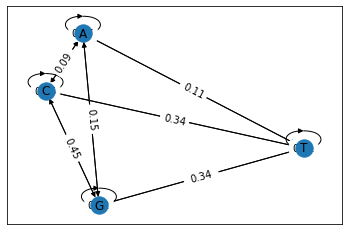

In [101]:
G = nx.MultiDiGraph()
"""create graph object by MultiDiGraph to have multiple arcs on the nodes to represent origin and destination for CpG sequnce"""
    
# nodes correspond to states
G.add_nodes_from(states)
print('Nodes:\n')
print(G.nodes())
print('\n')

# edges represent transition probabilities
for k, v in edges_wts.items(): # K and v as variables of edges
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v) # weight=transition probablity values 
print('Edges:')
pprint(G.edges(data=True))

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

"""creating edge labels for the plot for CpG island"""
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'markov.dot')
plt.show()

In [5]:
#HMM program

"""creating state space and initial state probabilities for hidden states S1 & S2"""
# with S1- non-CpG island and S2- CpG island
hidden_states = ['S1', 'S2']
pi = [0.5, 0.5] #equal probablities of S1 and S2
print('\n')
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n')
print(state_space.sum()) # sum of probablities of S1 and S2 = 1



S1    0.5
S2    0.5
Name: states, dtype: float64


1.0


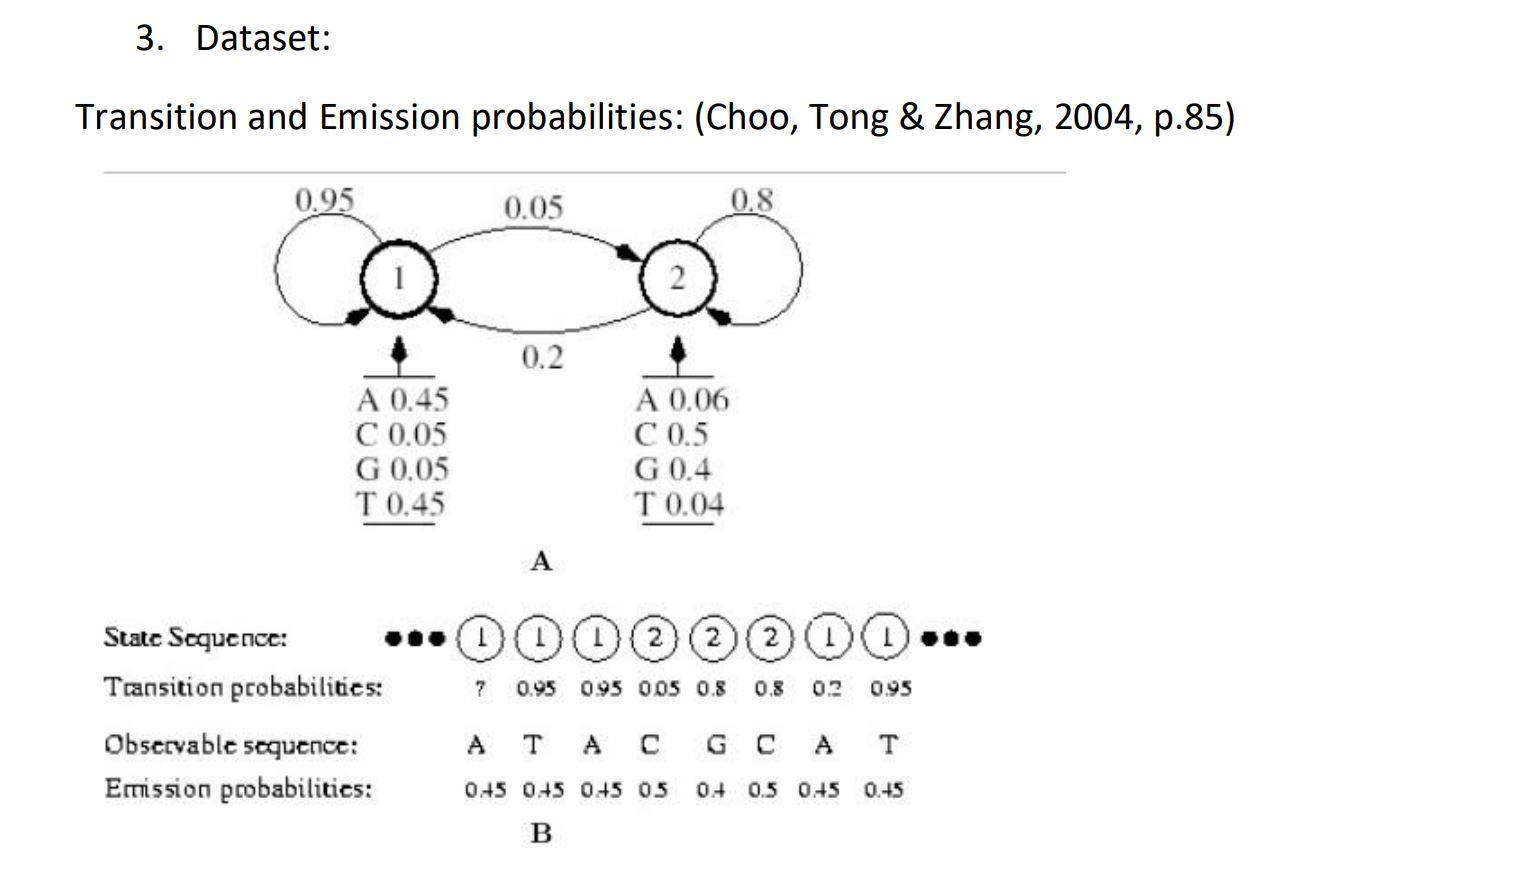

In [6]:
"""creating hidden transition matrix for HMM"""
# a or alpha = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is number of states

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.95, 0.05] #transition prob. from S1 to S1, S1 to S2
a_df.loc[hidden_states[1]] = [0.2, 0.8] #transition prob. from S2 to S1, S2 to S2

print(a_df)

a = a_df.values
print('\n')
print(a)
print(a.shape)
print('\n')
print(a_df.sum(axis=1)) #sum of probablities =1

      S1    S2
S1  0.95  0.05
S2   0.2   0.8


[[0.95 0.05]
 [0.2 0.8]]
(2, 2)


S1    1.0
S2    1.0
dtype: float64


In [7]:
"""creating matrix of observation (emission) probabilities"""
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is number of states 
# and O is number of different possible observations

observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.45, 0.05, 0.05, 0.45] #emission prob of ACGT at S1
b_df.loc[hidden_states[1]] = [0.06, 0.5, 0.4, 0.04] #emission prob of ACGT ar S2

print(b_df)

b = b_df.values
print('\n')
print(b)
print(b.shape)
print('\n')
print(b_df.sum(axis=1)) #sum of probablities =1

       A     C     G     T
S1  0.45  0.05  0.05  0.45
S2  0.06   0.5   0.4  0.04


[[0.45 0.05 0.05 0.45]
 [0.06 0.5 0.4 0.04]]
(2, 4)


S1    1.0
S2    1.0
dtype: float64


In [8]:
"""create graph edges and weights"""
hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('S1', 'S1'): 0.95, ('S1', 'S2'): 0.05, ('S2', 'S1'): 0.2, ('S2', 'S2'): 0.8}
{('S1', 'A'): 0.45,
 ('S1', 'C'): 0.05,
 ('S1', 'G'): 0.05,
 ('S1', 'T'): 0.45,
 ('S2', 'A'): 0.06,
 ('S2', 'C'): 0.5,
 ('S2', 'G'): 0.4,
 ('S2', 'T'): 0.04}


Nodes:
['S1', 'S2']

Edges:
OutMultiEdgeDataView([('S1', 'S1', {'weight': 0.95, 'label': 0.95}), ('S1', 'S2', {'weight': 0.05, 'label': 0.05}), ('S1', 'A', {'weight': 0.45, 'label': 0.45}), ('S1', 'C', {'weight': 0.05, 'label': 0.05}), ('S1', 'G', {'weight': 0.05, 'label': 0.05}), ('S1', 'T', {'weight': 0.45, 'label': 0.45}), ('S2', 'S1', {'weight': 0.2, 'label': 0.2}), ('S2', 'S2', {'weight': 0.8, 'label': 0.8}), ('S2', 'A', {'weight': 0.06, 'label': 0.06}), ('S2', 'C', {'weight': 0.5, 'label': 0.5}), ('S2', 'G', {'weight': 0.4, 'label': 0.4}), ('S2', 'T', {'weight': 0.04, 'label': 0.04})])


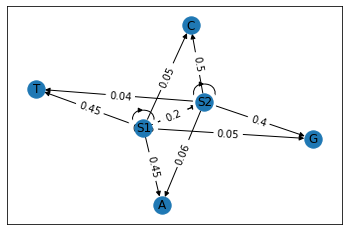

In [9]:
"""create graph object using MultiDiGraph"""
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for the plot
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'hidden_markov.dot')

In [10]:
"""observation sequence of nucleotides in DNA for CpG sequence of length 610"""
# observations are encoded numerically

obs_map = {'A':0, 'C':1, 'G':2, 'T':3}
CpG = np.array([2,1,1,1,1,1,0,3,1,1,1,1,0,1,2,1,1,1,3,3,1,3,1,2,2,1,3,1,0,2,2,2,1,2,3,2,1,0,3,2,0,0,1,1,3,2,1,2,2,0,3,2,2,1,1,2,2,1,2,2,2,1,2,0,2,3,2,2,1,1,1,3,3,1,2,1,2,0,3,1,2,1,2,2,1,1,2,1,1,1,1,3,1,3,0,2,2,1,2,2,0,2,2,1,0,1,1,2,2,2,2,0,1,1,2,0,0,1,1,1,2,3,2,0,1,3,3,1,2,0,2,1,3,1,1,0,1,3,2,1,2,2,0,1,2,0,0,3,1,1,1,2,2,2,0,1,1,2,1,2,1,2,1,1,3,1,2,1,2,2,0,0,2,0,2,1,2,2,1,1,2,1,1,2,3,2,1,0,2,1,2,1,2,2,0,2,2,2,0,3,0,1,2,1,1,3,1,2,1,1,2,1,0,1,1,3,1,1,1,1,3,1,2,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,3,1,1,1,1,2,1,1,1,2,2,1,3,1,3,2,1,3,2,1,1,2,1,1,2,1,2,2,1,2,2,1,1,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,3,1,3,2,1,1,2,1,1,2,1,3,2,1,1,2,1,1,2,1,1,2,1,3,2,1,1,3,2,2,0,3,0,3,0,2,3,2,1,2,2,1,0,0,2,0,2,1,2,2,0,2,1,3,3,2,1,0,2,3,1,0,1,3,3,3,2,1,2,0,2,2,0,2,2,0,2,1,2,1,2,1,2,2,2,1,3,2,1,2,2,2,1,2,2,1,3,2,2,2,2,1,0,1,1,2,1,2,2,2,0,2,1,2,2,1,2,2,1,2,2,1,2,2,1,3,1,3,0,2,1,0,2,0,2,2,1,2,2,1,1,2,2,2,2,1,0,2,1,2,0,0,0,2,2,3,3,1,3,1,3,1,3,1,1,0,2,2,2,1,3,2,2,0,1,3,3,0,0,3,0,0,1,3,3,3,2,0,0,0,1,3,2,3,1,1,0,1,1,2,2,3,2,3,1,0,1,2,3,1,1,3,2,0,0,1,0,3,2,0,2,1,1,3,1,1,3,1,1,3,1,3,1,1,3,3,1,3,0,1,1,3,2,1,3,2,2,2,2,3,3,2,1,3,3,2,3,1,0,2,3,0,2,1,2,2,2,1,0,0,2,2,3,0,2,2,0,2,3,2,3,2,2,1,2,1,3,3,3,0,3,3,2,1,0,3,3,3,0,1,3,3,3,1,1,1,3,1,1,1,1,1,3,3,1,1]) #cpg seq

inv_obs_map1 = dict((v,k) for k, v in obs_map.items()) #iterating over cpg seq
obs_seq1 = [inv_obs_map1[v] for v in list(CpG)]

print( pd.DataFrame(np.column_stack([CpG, obs_seq1]),
                columns=['Obs_code', 'Obs_seq']) )

    Obs_code Obs_seq
0          2       G
1          1       C
2          1       C
3          1       C
4          1       C
..       ...     ...
605        1       C
606        3       T
607        3       T
608        1       C
609        1       C

[610 rows x 2 columns]


In [11]:
"""using viterbi metrix(dynamic programming method) to know best probable path for CpG sequence of length 610"""
def viterbi(pi,a,b,CpG):

    nStates = np.shape(b)[0]
    T = np.shape(CpG)[0]

    path = np.zeros(T)
    delta = np.zeros((nStates,T))
    phi = np.zeros((nStates,T))

    delta[:,0] = pi * b[:,CpG[0]]
    phi[:,0] = 0

    for t in range(1,T):
        for s in range(nStates):
            delta[s,t] = np.max(delta[:,t-1]*a[:,s])*b[s,CpG[t]]
            phi[s,t] = np.argmax(delta[:,t-1]*a[:,s])

    path[T-1] = np.argmax(delta[:,T-1])
    for t in range(T-2,-1,-1):
        #path[t] = phi[int(path[t+1]): int(t+1) , int(t+1)]
        path[t] = phi[int(path[t+1]) , int(t+1)]

    return path,delta, phi

path, delta, phi = viterbi(pi, a, b, CpG)
print('\n')
print('single best state path: ', path)
print('delta:\n', delta)
print('phi:\n', phi)

state_map = {0:'S1', 1:'S2'}
state_path_CpG = [state_map[v] for v in path]


result = (pd.DataFrame()
 .assign(Observation=obs_seq1)
 .assign(Best_Path=state_path_CpG))
 
print(result)



single best state path:  [1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.

In [12]:
"""observation sequence of nucleotides in DNA for non CpG sequence of length 610"""
# observations are encoded numerically

obs_map = {'A':0, 'C':1, 'G':2, 'T':3}
non_CpG = np.array([2,3,0,3,0,0,3,1,1,0,0,3,3,0,2,3,1,3,0,3,3,3,3,0,2,2,3,0,3,3,1,0,3,3,2,1,3,0,3,0,0,1,0,3,3,3,3,1,1,1,3,1,0,3,1,1,3,3,3,3,0,1,1,0,1,3,2,0,0,3,0,1,0,2,0,0,0,1,3,0,0,3,0,2,1,3,1,0,3,0,3,0,3,3,3,3,2,0,0,3,3,3,2,3,3,0,0,0,0,2,0,1,3,1,3,3,1,1,1,1,2,3,2,3,2,3,2,3,2,2,0,3,3,3,3,2,1,1,3,2,3,0,2,2,0,0,1,0,1,0,2,2,0,1,3,1,0,1,1,2,1,3,2,3,0,2,0,3,0,1,3,3,2,1,0,2,0,0,2,1,0,1,3,2,0,0,2,1,3,1,1,3,2,2,0,2,2,2,3,1,3,1,1,3,3,3,2,1,0,2,3,1,3,2,2,0,0,2,0,3,3,3,1,1,3,1,1,0,1,2,0,2,0,0,0,1,0,0,2,3,1,1,0,1,3,0,0,2,3,2,2,2,1,0,1,0,2,0,1,0,3,1,1,3,1,0,1,0,2,1,0,0,1,2,2,2,1,1,0,1,0,1,2,2,0,1,1,1,3,1,3,2,2,3,1,3,2,3,1,3,1,3,0,1,3,2,1,0,3,3,1,1,3,0,2,0,0,0,1,0,2,2,2,1,0,0,3,1,0,2,1,0,3,2,2,0,0,2,0,1,0,1,3,2,1,0,1,3,3,2,2,2,2,1,1,1,0,1,0,2,0,1,0,1,3,2,0,2,2,2,1,3,3,2,1,3,3,2,0,0,0,0,2,3,2,1,0,0,2,0,2,3,1,0,2,3,1,0,2,2,1,1,2,1,2,2,3,2,2,1,3,1,0,1,2,1,1,3,2,3,0,0,3,1,1,1,0,2,1,0,1,3,3,3,2,2,0,0,2,2,1,1,2,0,0,2,1,2,2,2,3,2,2,0,3,1,0,3,2,0,2,2,3,1,0,0,2,0,2,0,3,1,1,0,2,0,1,1,0,3,1,1,3,2,2,1,3,0,0,1,0,3,2,2,3,2,0,0,0,1,1,1,3,2,3,1,3,1,3,0,1,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,3,3,0,2,1,1,3,2,2,3,2,3,2,2,3,2,2,1,2,2,2,1,2,1,1,3,2,3,0,2,3,1,1,1,0,2,1,3,0,1,3,1,2,2,2,0,2,2,1,3,2,0,0,2,1,0,2,2,0,2,0,0,3,2,0,1,2,3,2,0,0,2,1,1,2,2,2,0,2,2,1,0,2,0]) #non cpg seq

inv_obs_map2 = dict((v,k) for k, v in obs_map.items()) #iterating over non cpg seq
obs_seq2 = [inv_obs_map2[v] for v in list(non_CpG)]

print( pd.DataFrame(np.column_stack([non_CpG, obs_seq2]),
                columns=['Obs_code', 'Obs_seq']) )

    Obs_code Obs_seq
0          2       G
1          3       T
2          0       A
3          3       T
4          0       A
..       ...     ...
606        2       G
607        1       C
608        0       A
609        2       G
610        0       A

[611 rows x 2 columns]


In [13]:
"""using viterbi metrix(dynamic programming method) to know best probable path for non CpG sequence of length 610"""
def viterbi(pi,a,b,non_CpG):

    nStates = np.shape(b)[0]
    T = np.shape(non_CpG)[0]

    path = np.zeros(T)
    delta = np.zeros((nStates,T))
    phi = np.zeros((nStates,T))

    delta[:,0] = pi * b[:,non_CpG[0]]
    phi[:,0] = 0

    for t in range(1,T):
        for s in range(nStates):
            delta[s,t] = np.max(delta[:,t-1]*a[:,s])*b[s,non_CpG[t]]
            phi[s,t] = np.argmax(delta[:,t-1]*a[:,s])

    path[T-1] = np.argmax(delta[:,T-1])
    for t in range(T-2,-1,-1):
        #path[t] = phi[int(path[t+1]): int(t+1) , int(t+1)]
        path[t] = phi[int(path[t+1]) , int(t+1)]

    return path,delta, phi

path, delta, phi = viterbi(pi, a, b, non_CpG)
print('\n')
print('single best state path: ', path)
print('delta:\n', delta)
print('phi:\n', phi)

state_map = {0:'S1', 1:'S2'}
state_path_non_CpG = [state_map[v] for v in path]


result = (pd.DataFrame()
 .assign(Observation=obs_seq2)
 .assign(Best_Path=state_path_non_CpG))
 
print(result)



single best state path:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.

In [15]:
"""observation sequence of nucleotides in DNA for test sequence of length 610"""
# observations are encoded numerically

obs_map = {'A':0, 'C':1, 'G':2, 'T':3}
test = np.array([0,1,1,0,2,2,0,2,1,3,1,1,2,2,2,1,2,2,2,1,0,2,1,0,2,1,3,2,1,2,2,0,0,2,0,2,1,1,2,1,2,1,2,0,2,2,1,3,3,1,1,1,0,2,0,0,1,1,1,2,2,1,1,2,2,2,2,1,2,2,2,0,0,2,0,1,2,1,0,2,0,0,2,3,2,2,2,2,0,2,2,1,2,2,0,0,1,1,2,2,2,0,1,1,1,1,2,1,0,2,0,2,1,1,1,2,2,2,3,1,1,1,3,2,1,2,1,1,1,1,0,1,0,0,2,1,1,3,3,2,2,1,3,3,1,1,1,3,2,1,3,0,2,2,2,1,1,2,2,2,1,0,0,2,2,1,1,2,2,2,3,2,1,0,2,2,2,1,2,1,2,2,1,3,1,1,0,2,2,2,0,2,2,0,0,2,1,3,1,1])

inv_obs_map3 = dict((v,k) for k, v in obs_map.items()) #iterating over test seq
obs_seq3 = [inv_obs_map3[v] for v in list(test)]

print( pd.DataFrame(np.column_stack([test, obs_seq3]),
                columns=['Obs_code', 'Obs_seq']) )

    Obs_code Obs_seq
0          0       A
1          1       C
2          1       C
3          0       A
4          2       G
..       ...     ...
195        2       G
196        1       C
197        3       T
198        1       C
199        1       C

[200 rows x 2 columns]


In [16]:
"""using viterbi metrix(dynamic programming method) to know best probable path for test sequence of length 200"""
def viterbi(pi,a,b,test):

    nStates = np.shape(b)[0]
    T = np.shape(test)[0]

    path = np.zeros(T)
    delta = np.zeros((nStates,T))
    phi = np.zeros((nStates,T))

    delta[:,0] = pi * b[:,test[0]]
    phi[:,0] = 0

    for t in range(1,T):
        for s in range(nStates):
            delta[s,t] = np.max(delta[:,t-1]*a[:,s])*b[s,test[t]]
            phi[s,t] = np.argmax(delta[:,t-1]*a[:,s])

    path[T-1] = np.argmax(delta[:,T-1])
    for t in range(T-2,-1,-1):
        #path[t] = phi[int(path[t+1]): int(t+1) , int(t+1)]
        path[t] = phi[int(path[t+1]) , int(t+1)]

    return path,delta, phi

path, delta, phi = viterbi(pi, a, b, test)
print('\n')
print('single best state path: ', path)
print('delta:\n', delta)
print('phi:\n', phi)

state_map = {0:'S1', 1:'S2'}
state_path_test = [state_map[v] for v in path]


result = (pd.DataFrame()
 .assign(Observation=obs_seq3)
 .assign(Best_Path=state_path_test))
 
print(result)



single best state path:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1.]
delta:
 [[2.25000000e-001 1.06875000e-002 5.07656250e-004 4.32000000e-004
  2.05200000e-005 9.74700000e-007 2.12336640e-006 1.00859904e-007
  4.79084544e-009 1.30459632e-008 6.19683250e-010 2.94349544e-011
  7.42170349e-012 2.37494512e-012 7.59982437e-013 2.43194380e-013
  9.72777520e-014 3.11288806e-014 9.96124180e-015 3.18759738e-015
  1.14753506e-014 5.45079

In [17]:
#get the count of S1 & S2 states in CpG sequence
from collections import Counter
"""counting number of S1(non-CpG) and S2(CpG)"""
new_vals= Counter(state_path_CpG).most_common()
new_vals=new_vals[::-1]
for a,b in new_vals:
    print(a,b) # As observed in output S2 states are dominant as they had high probability of GC

S1 220
S2 390


In [18]:
#get the count of S1 & S2 states in non CpG sequence
from collections import Counter
"""counting number of S1(non-CpG) and S2(CpG)"""
new_vals1= Counter(state_path_non_CpG).most_common()
new_vals1=new_vals1[::-1]
for a,b in new_vals1:
    print(a,b) # As observed in output S1 states are dominant as they had high probability of AT

S2 142
S1 469


In [22]:
#get the count of S1 & S2 states in test sequence
from collections import Counter
"""counting number of S1(non-CpG) and S2(CpG)"""
new_vals2= Counter(state_path_test).most_common()
new_vals2=new_vals2[::-1]
for a,b in new_vals2:
    print(a,b) # As observed in output S2 states are dominant in test sequence same as CpG island

S1 36
S2 164


In [53]:
# CpG detection critera 1: length of segment is at least 200 bp

CpG='GCCCCCATCCCCACGCCCTTCTCGGCTCAGGGCGTGCATGAACCTGCGGATGGCCGGCGGGCGAGTGGCCCTTCGCGATCGCGGCCGCCCCTCTAGGCGGAGGCACCGGGGACCGAACCCGTGACTTCGAGCTCCACTGCGGACGAATCCCGGGACCGCGCGCCTCGCGGAAGAGCGGCCGCCGTGCAGCGCGGAGGGATACGCCTCGCCGCACCTCCCCTCGCCGCGCCCCCGCCCCCGCCGCCCTCCCCGCCCGGCTCTGCTGCCGCCGCGGCGGCCGCTGCTGCTGCTGCTTCTGCCGCCGCTGCCGCCGCCGCTGCCTGGATATAGTGCGGCAAGAGCGGAGCTTGCAGTCACTTTGCGAGGAGGAGCGCGCGGGCTGCGGGCGGCTGGGGCACCGCGGGAGCGGCGGCGGCGGCTCTAGCAGAGGCGGCCGGGGCAGCGAAAGGTTCTCTCTCCAGGGCTGGACTTAATAACTTTGAAACTGTCCACCGGTGTCACGTCCTGAACATGAGCCTCCTCCTCTCCTTCTACCTGCTGGGGTTGCTTGTCAGTAGCGGGCAAGGTAGGAGTGTGGCGCTTTATTGCATTTACTTTCCCTCCCCCTTCC' #cpg seq
length_CpG= (len('GCCCCCATCCCCACGCCCTTCTCGGCTCAGGGCGTGCATGAACCTGCGGATGGCCGGCGGGCGAGTGGCCCTTCGCGATCGCGGCCGCCCCTCTAGGCGGAGGCACCGGGGACCGAACCCGTGACTTCGAGCTCCACTGCGGACGAATCCCGGGACCGCGCGCCTCGCGGAAGAGCGGCCGCCGTGCAGCGCGGAGGGATACGCCTCGCCGCACCTCCCCTCGCCGCGCCCCCGCCCCCGCCGCCCTCCCCGCCCGGCTCTGCTGCCGCCGCGGCGGCCGCTGCTGCTGCTGCTTCTGCCGCCGCTGCCGCCGCCGCTGCCTGGATATAGTGCGGCAAGAGCGGAGCTTGCAGTCACTTTGCGAGGAGGAGCGCGCGGGCTGCGGGCGGCTGGGGCACCGCGGGAGCGGCGGCGGCGGCTCTAGCAGAGGCGGCCGGGGCAGCGAAAGGTTCTCTCTCCAGGGCTGGACTTAATAACTTTGAAACTGTCCACCGGTGTCACGTCCTGAACATGAGCCTCCTCCTCTCCTTCTACCTGCTGGGGTTGCTTGTCAGTAGCGGGCAAGGTAGGAGTGTGGCGCTTTATTGCATTTACTTTCCCTCCCCCTTCC')) #cpg seq
print('Length of CpG sequence is ' + str(length_CpG))

non_CpG='GTATAATCCAATTAGTCTATTTTAGGTATTCATTGCTATAACATTTTCCCTCATCCTTTTACCACTGAATACAGAAACTAATAGCTCATATATTTTGAATTTGTTAAAAGACTCTTCCCCGTGTGTGTGGATTTTGCCTGTAGGAACACAGGACTCACCGCTGTAGATACTTGCAGAAGCACTGAAGCTCCTGGAGGGTCTCCTTTGCAGTCTGGAAGATTTCCTCCACGAGAAACAAGTCCACTAAGTGGGCACAGACATCCTCACAGCAACGGGCCACACGGACCCTCTGGTCTGTCTCTACTGCATTCCTAGAAACAGGGCAATCAGCATGGAAGACACTGCACTTGGGGCCCACAGACACTGAGGGCTTGCTTGAAAAGTGCAAGAGTCAGTCAGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGAAGGCCGAAGCGGGTGGATCATGAGGTCAAGAGATCCAGACCATCCTGGCTAACATGGTGAAACCCTGTCTCTACTAAAAATACAAAAAAATTAGCCTGGTGTGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAAGCAGGAGAATGACGTGAAGCCGGGAGGCAGA'  #non cpg seq
length_non_CpG= (len('GTATAATCCAATTAGTCTATTTTAGGTATTCATTGCTATAACATTTTCCCTCATCCTTTTACCACTGAATACAGAAACTAATAGCTCATATATTTTGAATTTGTTAAAAGACTCTTCCCCGTGTGTGTGGATTTTGCCTGTAGGAACACAGGACTCACCGCTGTAGATACTTGCAGAAGCACTGAAGCTCCTGGAGGGTCTCCTTTGCAGTCTGGAAGATTTCCTCCACGAGAAACAAGTCCACTAAGTGGGCACAGACATCCTCACAGCAACGGGCCACACGGACCCTCTGGTCTGTCTCTACTGCATTCCTAGAAACAGGGCAATCAGCATGGAAGACACTGCACTTGGGGCCCACAGACACTGAGGGCTTGCTTGAAAAGTGCAAGAGTCAGTCAGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGAAGGCCGAAGCGGGTGGATCATGAGGTCAAGAGATCCAGACCATCCTGGCTAACATGGTGAAACCCTGTCTCTACTAAAAATACAAAAAAATTAGCCTGGTGTGGTGGCGGGCGCCTGTAGTCCCAGCTACTCGGGAGGCTGAAGCAGGAGAATGACGTGAAGCCGGGAGGCAGA'))  #non cpg seq
print('Length of non CpG sequence is ' + str(length_non_CpG))

test='ACCAGGAGCTCCGGGCGGGCAGCAGCTGCGGAAGAGCCGCGCGAGGCTTCCCAGAACCCGGCCGGGGCGGGAAGACGCAGAAGTGGGGAGGCGGAACCGGGACCCCGCAGAGCCCGGGTCCCTGCGCCCCACAAGCCTTGGCTTCCCTGCTAGGGCCGGGCAAGGCCGGGTGCAGGGCGCGGCTCCAGGGAGGAAGCTCC'#test seq  
length_test= (len('ACCAGGAGCTCCGGGCGGGCAGCAGCTGCGGAAGAGCCGCGCGAGGCTTCCCAGAACCCGGCCGGGGCGGGAAGACGCAGAAGTGGGGAGGCGGAACCGGGACCCCGCAGAGCCCGGGTCCCTGCGCCCCACAAGCCTTGGCTTCCCTGCTAGGGCCGGGCAAGGCCGGGTGCAGGGCGCGGCTCCAGGGAGGAAGCTCC'))   #test seq
print('Length of test sequence is ' + str(length_test))

Length of CpG sequence is 610
Length of non CpG sequence is 610
Length of test sequence is 200


In [79]:
# CpG detection critera 2: G and C contents are ≥ 50%

GG= (count('GG', CpG)) #Count GG in the sequence
GC= (count('GC', CpG)) #Count GC in the sequence
CG= (count('CG', CpG)) #Count CG in the sequence
CC= (count('CC', CpG)) #Count CC in the sequence

observed_CpG= GG+GC+CG+CC #sum GC dinucleotides
percent_observed_CpG=(observed_CpG/length_CpG * 100) #percentage of GC in total sequence
print('G and C contents in CpG sequence are ' + str(percent_observed_CpG) + '%')

GG= (count('GG', non_CpG)) #Count GG in the sequence
GC= (count('GC', non_CpG)) #Count GC in the sequence
CG= (count('CG', non_CpG)) #Count CG in the sequence
CC= (count('CC', non_CpG)) #Count CC in the sequence

observed_non_CpG= GG+GC+CG+CC #sum GC dinucleotides
percent_observed_non_CpG=(observed_non_CpG/length_non_CpG * 100) #percentage of GC in total sequence
print('G and C contents in non CpG sequence are ' + str(percent_observed_non_CpG) + '%')

GG= (count('GG', test)) #Count GG in the sequence
GC= (count('GC', test)) #Count GC in the sequence
CG= (count('CG', test)) #Count CG in the sequence
CC= (count('CC', test)) #Count CC in the sequence

observed_test= GG+GC+CG+CC #sum GC dinucleotides
percent_observed_test=(observed_non_CpG/length_test * 100) #percentage of GC in total sequence
print('G and C contents in test sequence are ' + str(percent_observed_test) + '%')

G and C contents in CpG sequence are 50.1639344262295%
G and C contents in non CpG sequence are 21.639344262295083%
G and C contents in test sequence are 66.0%


In [94]:
# CpG detection critera 3:observed CpG to expected CpG ratio (o/e) is ≥ 0.6. Observed CpG is the number of CpG dinucleoetides in a segment and expected CpG is calculated by multiplying the number of ‘C’s and the number of ‘G’s in a segment and then dividing the product by length of the segment

G= (count('G', CpG)) #count no. of G in main sequence
C= (count('C', CpG)) #count no. of C in main sequence
expected_CpG= ((G*C)/length_CpG) #expected CpG is calculated by multiplying the number of ‘C’s and the number of ‘G’s in a segment and then dividing the product by length of the segment
observed_by_expected_CpG= observed_CpG/expected_CpG #observed CpG to expected CpG ratio
print('o/e ratio for CpG sequence is '+ str(observed_by_expected_CpG))

G= (count('G', non_CpG)) #count no. of G in main sequence
C= (count('C', non_CpG)) #count no. of C in main sequence
expected_non_CpG= ((G*C)/length_non_CpG) #expected CpG is calculated by multiplying the number of ‘C’s and the number of ‘G’s in a segment and then dividing the product by length of the segment
observed_by_expected_non_CpG= observed_non_CpG/expected_non_CpG #observed CpG to expected CpG ratio
print('o/e ratio for non CpG sequence is '+ str(observed_by_expected_non_CpG))

G= (count('G', test)) #count no. of G in main sequence
C= (count('C', test)) #count no. of C in main sequence
expected_test= ((G*C)/length_test) #expected CpG is calculated by multiplying the number of ‘C’s and the number of ‘G’s in a segment and then dividing the product by length of the segment
observed_by_expected_test = observed_test/expected_test #observed CpG to expected CpG ratio
print('o/e ratio for test sequence is '+ str(observed_by_expected_test))

o/e ratio for CpG sequence is 4.068616766206024
o/e ratio for non CpG sequence is 3.5793029871977238
o/e ratio for test sequence is 4.004368401892974


In [91]:
#Combining 3 criterias from above to test known CpG sequence
#1. length of segment is at least 200 bp,
#2. G and C contents are ≥ 50%, and 
#3. observed CpG to expected CpG ratio (o/e) is ≥ 0.6

length_of_segment = length_CpG
G_and_C_contents = percent_observed_CpG 
observedCpG_by_expectedCpG_ratio = observed_by_expected_CpG

if length_of_segment >= 200:
    if G_and_C_contents >= 50:
        if observedCpG_by_expectedCpG_ratio >=0.6:
            print ("For known CpG sequence: CpG island detected")
    else:
        print ("For known CpG sequence: CpG island NOT detected")

For known CpG sequence: CpG island detected


In [92]:
#Combining 3 criterias from above to test known non CpG sequence

length_of_segment = length_non_CpG
G_and_C_contents = percent_observed_non_CpG 
observedCpG_by_expectedCpG_ratio = observed_by_expected_non_CpG

if length_of_segment >= 200:
    if G_and_C_contents >= 50:
        if observedCpG_by_expectedCpG_ratio >=0.6:
            print ("For known non CpG sequence: CpG island detected")
    else:
        print ("For known non CpG sequence: CpG island NOT detected")

For known non CpG sequence: CpG island NOT detected


In [110]:
#Combining 3 criterias from above to verify test sequence

length_of_segment = length_test
G_and_C_contents = percent_observed_test 
observedCpG_by_expectedCpG_ratio = observed_by_expected_test

if length_of_segment >= 200:
    if G_and_C_contents >= 50:
        if observedCpG_by_expectedCpG_ratio >=0.6:
            print ("Test sequence definitely is substring of a CpG island")
    else:
        print ("Test sequence is not a substring of a CpG island")

Test sequence definitely is substring of a CpG island
